This notebook will be used to compare model outputs of temperature and salinity to the VENUS nodes data.

In [16]:
import matplotlib.pyplot as plt
from salishsea_tools.nowcast import analyze
from salishsea_tools.nowcast import figures
from salishsea_tools.nowcast import research_VENUS
from salishsea_tools import tidetools
import datetime
from dateutil import tz
import numpy as np
import netCDF4 as nc

%matplotlib inline

In [17]:
grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)

In [18]:
T = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/01feb15/SalishSea_1d_20150201_20150201_grid_T.nc')
model_depths = T.variables['deptht'][:]

In [19]:
t_o = datetime.datetime(2015, 1, 1)
t_f = datetime.datetime(2015, 6, 10)

fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/data/dlatorne/MEOPAR/SalishSea/nowcast/')

In [20]:
def truncate(data, t_o,t_f):
    sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
    data_trun = data[(data.date< edt) & (data.date >sdt)]
    return data_trun

In [42]:
def compare_temp_sal_timeseries(station,figsize=(13,4)):
    data= research_VENUS.load_VENUS(station)
    lon = research_VENUS.SITES['VENUS'][station]['lon']
    lat = research_VENUS.SITES['VENUS'][station]['lat']
    depth = research_VENUS.SITES['VENUS'][station]['depth']
    data[['sal','temp']]=data[['sal','temp']].astype(float)
    data_trun = truncate(data,t_o,t_f)
    
    for i in np.arange(0,depth,20):
        k = tidetools.find_model_level(i,model_depths)
    
    print k
    [j,i] = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

    sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
    temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?
    
    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
    
    fig= plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(time,sal,label='model')
    ax.plot(data.date[:],data.sal[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Salinity comparison -  VENUS {}'.format(station), **font)
    ax.set_ylabel('Salinty [PSU]', **font)
    print 'Observed Salinity: Mean {}, std {}'.format(data_trun.sal.mean(), data_trun.sal.std())    
    print 'Modelled Salinity: Mean {}, std {}'.format(np.mean(sal), np.std(sal))
    ax.grid()
    
    fig= plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(time,temp,label='model')
    ax.plot(data.date[:],data.temp[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Temp. comparison - VENUS {}'.format(station), **font)
    ax.set_ylabel('Temperature (deg C)', **font)
    print 'Observed Temperature: Mean {}, std {}'.format(data_trun.temp.mean(), data_trun.temp.std())    
    print 'Modelled Temperature: Mean {}, std {}'.format(np.mean(temp), np.std(temp))  
    ax.grid()
    
    
    return fig

33
Observed Salinity: Mean 31.0359141475, std 0.063228046636
Modelled Salinity: Mean 30.521484375, std 0.0652276575565
Observed Temperature: Mean 9.25839722803, std 0.1297400755
Modelled Temperature: Mean 9.728266716, std 0.0345679782331


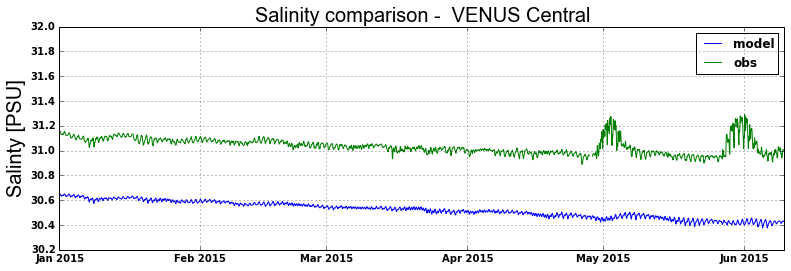

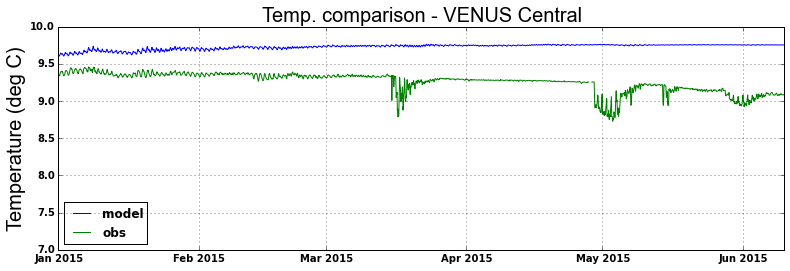

In [43]:
fig = compare_temp_sal_timeseries('Central')

28
Observed Salinity: Mean 30.4803441782, std 0.28193928007
Modelled Salinity: Mean 30.1069850922, std 0.182428821921
Observed Temperature: Mean 9.13118877312, std 0.229264028501
Modelled Temperature: Mean 9.71099185944, std 0.124591842294


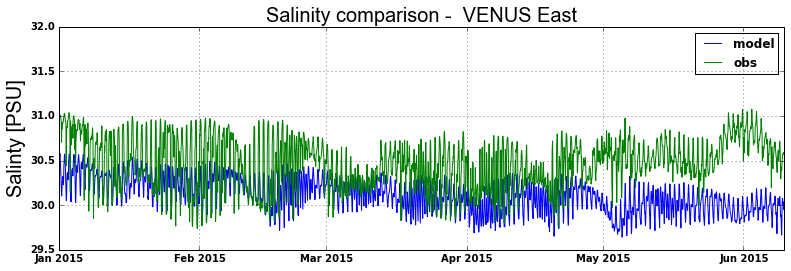

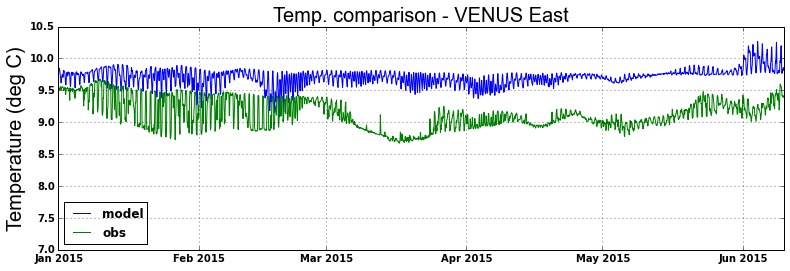

In [44]:
fig = compare_temp_sal_timeseries('East')